# CART

In this notebook we give a take on the CART algorithm used to train decision trees.

The objective function for a _greedy_ decision tree model is given by $(i, j)$ such that 

$$
    \min_{i, j}\left[\sum_{\{i | x_i \in R_1(j, s)\}}(y_i - \hat c_1)^2 + \sum_{\{i | x_i \in R_2(j, s)\}}(y_i - \hat c_2)^2\right]
$$

Where,

$$
    \hat c_k = \frac{1}{N_k}\sum_{\{n|x_n\in R_k(j, s)\}} x_n
$$

That is, our search algorithm is to find, for each input dimension $j$, the value $s$ that minimizes the error term

In [48]:
import numpy as np
from numpy.random import seed, multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import style

In [49]:
%config InlineBackend.figure_format = "retina"
style.use("seaborn-white")
plt.rcParams.update({'font.size': 15})

In [131]:
def Ri(X, j, s):
    """
    Considering a dataset X, compute whether
    each of the observations belong to R1 or R2.
    We assing an observation x to be in R1 if
    x_j <= s; otherwise we asign it to R2. In other words,
    we define the subset R1 of X as
    
    R1 = {x | x_j <= s};
    R2 = X - R1
    """
    return X[:, j] <= s

def RSS(y):
    return np.mean((y - y.mean()) ** 2)

def minft(X, y, j, s):
    return RSS(y[Ri(X, j, s)]) + RSS(y[~Ri(X, j, s)])

Text(0, 0.5, '$x_2$')

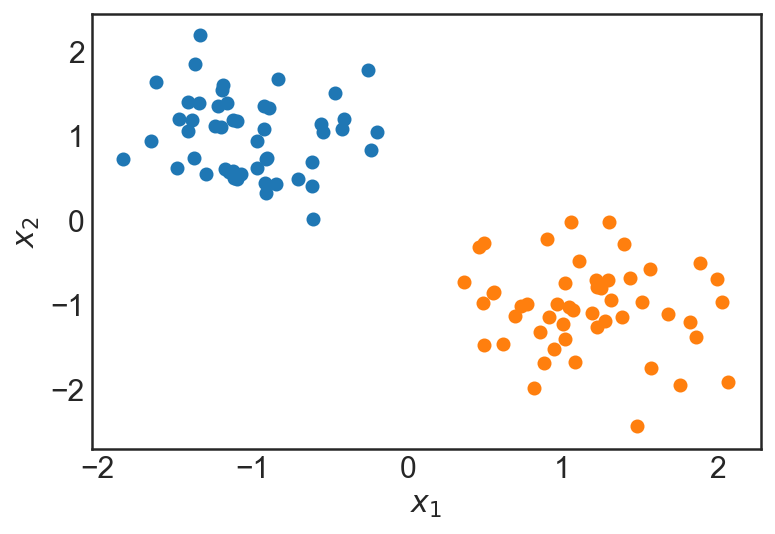

In [54]:
seed(314)
D1 = multivariate_normal([-1,1], np.identity(2) * 0.2, 50)
D2 = multivariate_normal([1,-1], np.identity(2) * 0.2, 50)

plt.scatter(*D1.T)
plt.scatter(*D2.T)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [100]:
seed(271)
y1 = np.random.randn(50) + 3
y2 = np.random.randn(50) - 4

In [101]:
D = np.r_[D1,D2]
y = np.r_[y1, y2]

For fixed, $j$, let us compute $s$ that minimizes the clases

----

### Considering the first dimension

In [186]:
s = 0.4
j = 0 # The target dimension that will be used to locally minimze
RSS(y[Ri(D, j, s)]) + RSS(y[~Ri(D, j, s)])

3.2286050770090116

In [188]:
vmin, vmax = D[:,j].min(), D[:,j].max() * 0.99
srange = np.linspace(vmin, vmax,  10)
s = min([(sh, minft(D, y, j, sh)) for sh in srange], key=lambda v: v[1])[0]

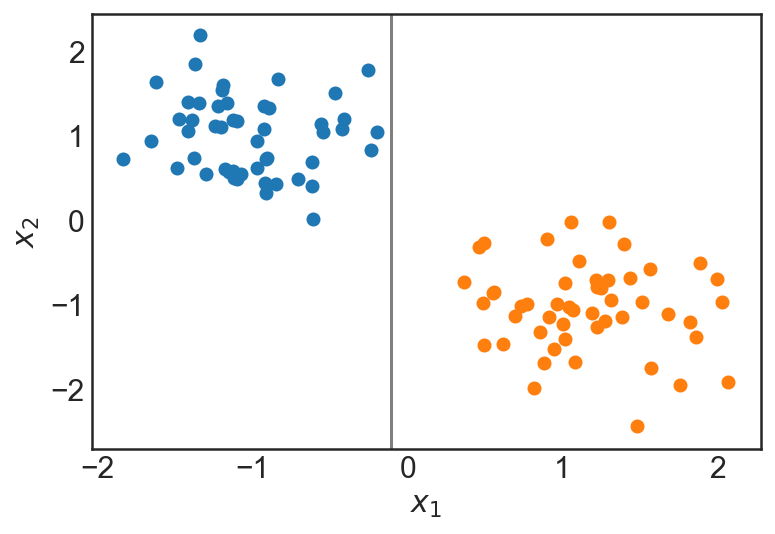

In [190]:
plt.scatter(*D1.T)
plt.scatter(*D2.T)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.axvline(x=s, c="tab:gray")

### Considering the second dimension

In [191]:
j = 1
vmin, vmax = D[:,j].min(), D[:,j].max() * 0.99
srange = np.linspace(vmin, vmax,  10)
s = min([(sh, minft(D, y, j, sh)) for sh in srange], key=lambda v: v[1])[0]

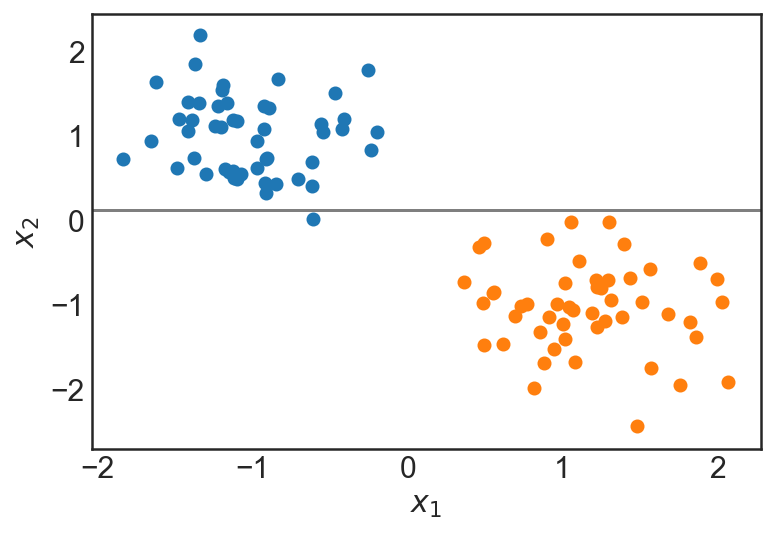

In [192]:
plt.scatter(*D1.T)
plt.scatter(*D2.T)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.axhline(y=s, c="tab:gray")